In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv(r"/content/Agriculture_commodities_dataset.csv")

In [27]:
df.head()


,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   Year             62429 non-null  int64 
 3   Month            62429 non-null  object
 4   arrivals_in_qtl  62429 non-null  int64 
 5   min_price        62429 non-null  int64 
 6   max_price        62429 non-null  int64 
 7   modal_price      62429 non-null  int64 
 8   date             62429 non-null  object
 9   district_name    62429 non-null  object
 10  state_name       62429 non-null  object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [29]:
df["APMC"].value_counts()

,count
APMC,
Mumbai,1538
Pune,1513
Nagpur,1340
Barshi,1076
Jalgaon,1055
...,...
Karjat (A- Nagar),2
Biloli,2
Talegaon Dabhade,1


In [30]:
df=df.drop(['date'],axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   Year             62429 non-null  int64 
 3   Month            62429 non-null  object
 4   arrivals_in_qtl  62429 non-null  int64 
 5   min_price        62429 non-null  int64 
 6   max_price        62429 non-null  int64 
 7   modal_price      62429 non-null  int64 
 8   district_name    62429 non-null  object
 9   state_name       62429 non-null  object
dtypes: int64(5), object(5)
memory usage: 4.8+ MB


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.select_dtypes(include='object').columns:
  df[i]=le.fit_transform(df[i])


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   APMC             62429 non-null  int64
 1   Commodity        62429 non-null  int64
 2   Year             62429 non-null  int64
 3   Month            62429 non-null  int64
 4   arrivals_in_qtl  62429 non-null  int64
 5   min_price        62429 non-null  int64
 6   max_price        62429 non-null  int64
 7   modal_price      62429 non-null  int64
 8   district_name    62429 non-null  int64
 9   state_name       62429 non-null  int64
dtypes: int64(10)
memory usage: 4.8 MB


In [34]:
df.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,state_name
0,4,24,2015,0,79,1406,1538,1463,0,0
1,4,24,2016,0,106,1788,1925,1875,0,0
2,4,348,2015,0,1253,1572,1890,1731,0,0
3,4,348,2016,0,387,1750,2220,1999,0,0
4,4,310,2015,0,3825,1600,2200,1900,0,0


APMC


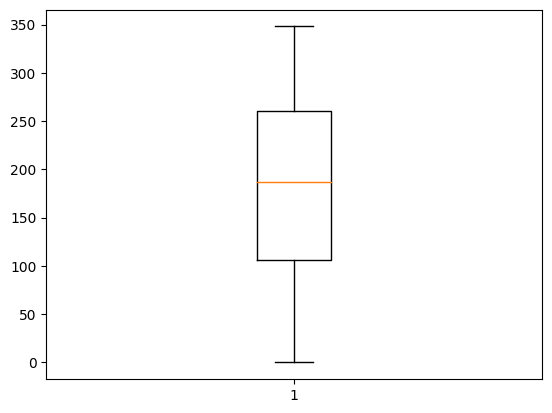

Commodity


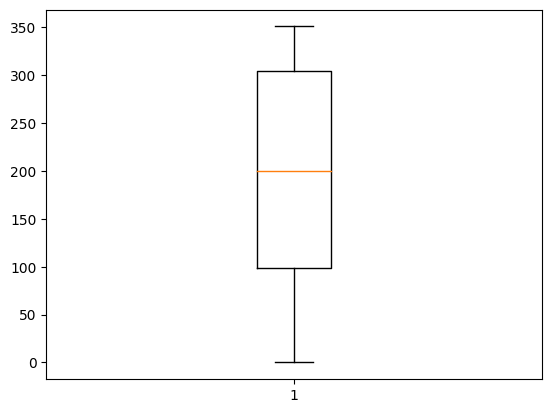

Year


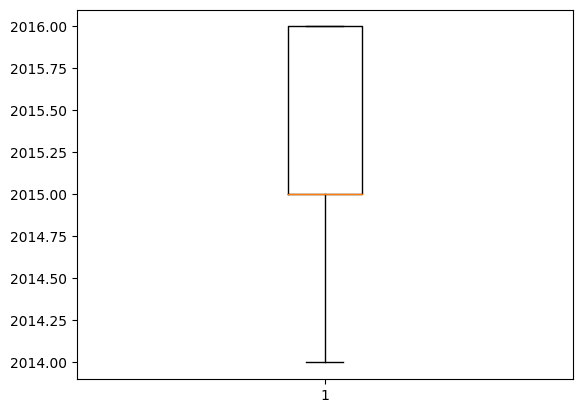

Month


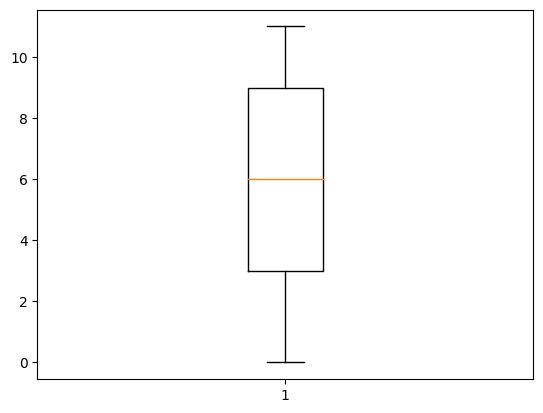

arrivals_in_qtl


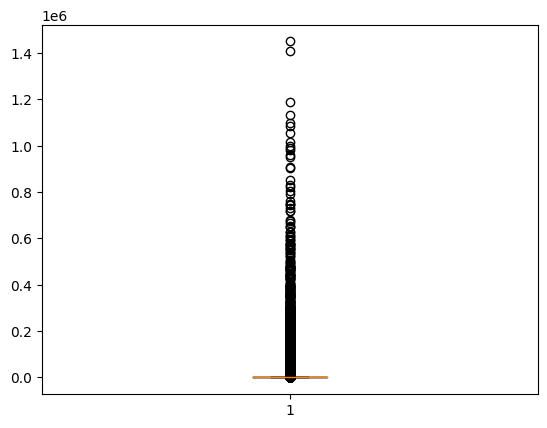

min_price


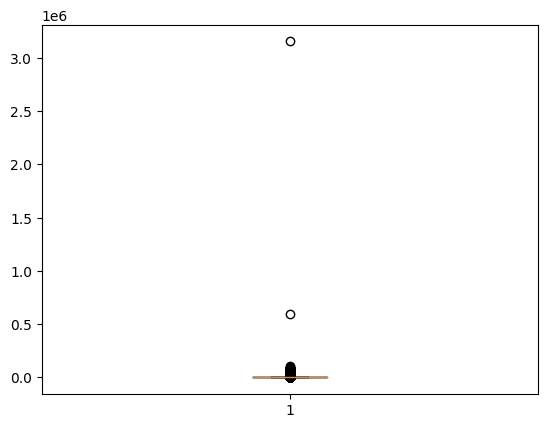

max_price


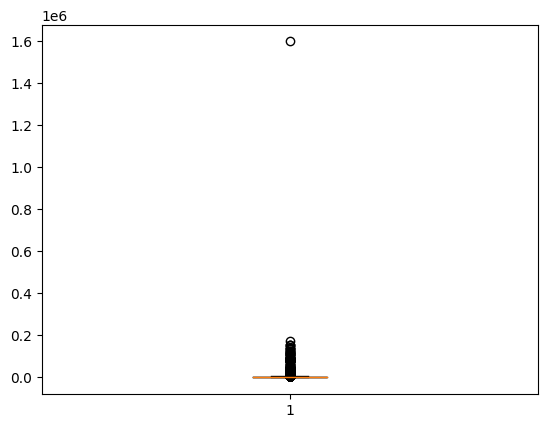

modal_price


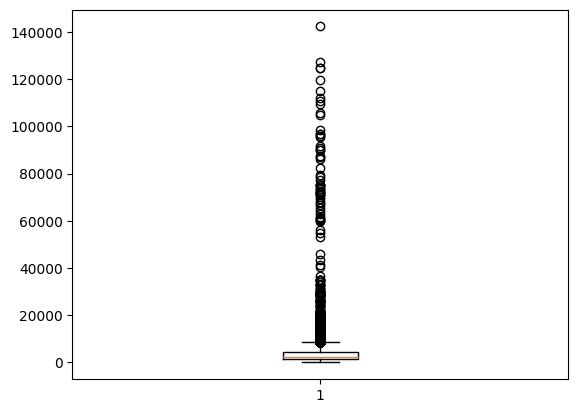

district_name


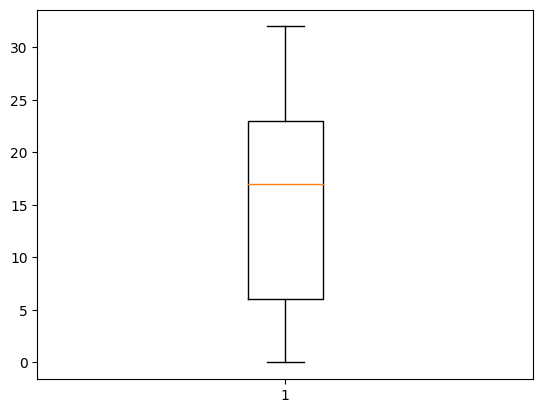

state_name


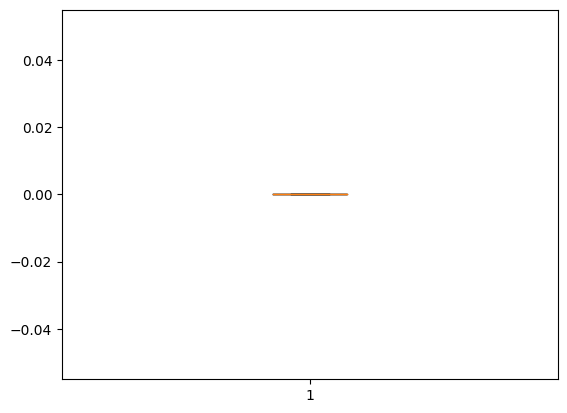

In [35]:
for i in df.columns:
  plt.boxplot(df[i])
  print(i)
  plt.show()

In [36]:
out_list=["arrivals_in_qtl","min_price","max_price","modal_price"]
for i in out_list:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  df=df[(df[i]>=lower) & (df[i]<=upper)]

APMC


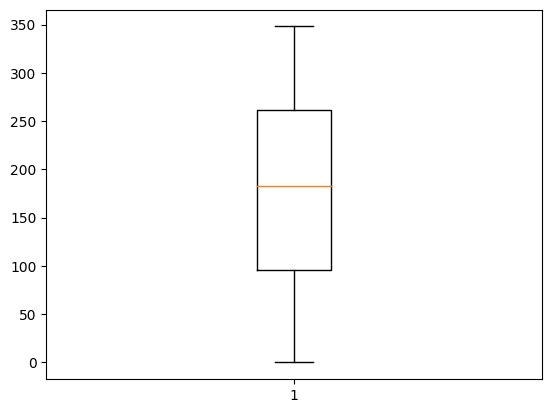

Commodity


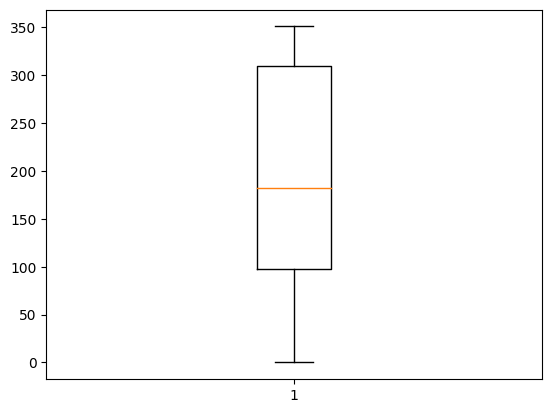

Year


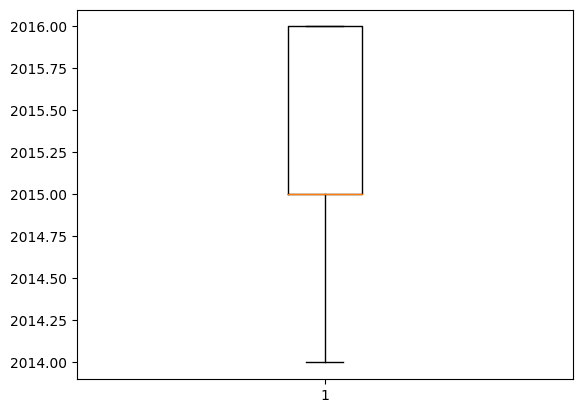

Month


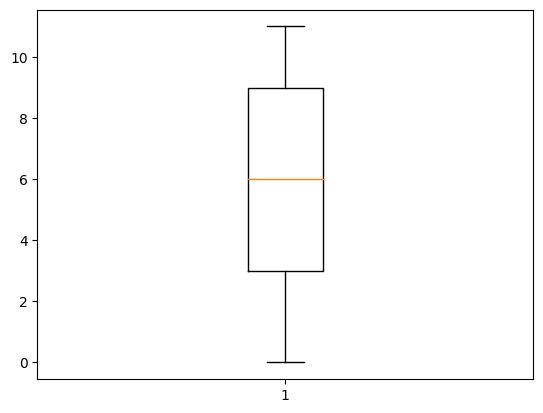

arrivals_in_qtl


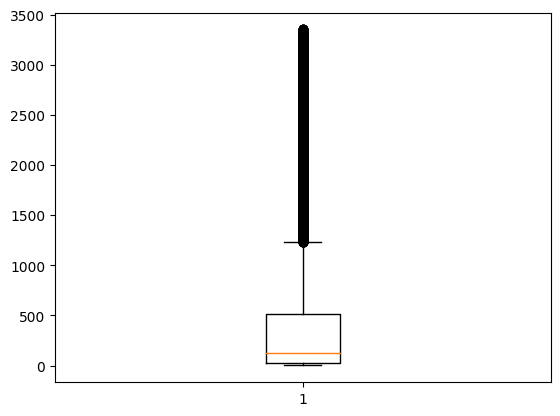

min_price


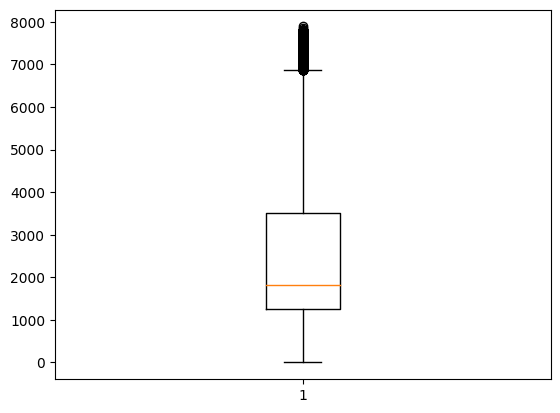

max_price


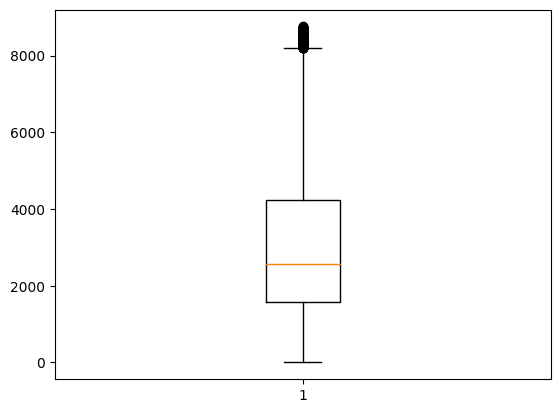

modal_price


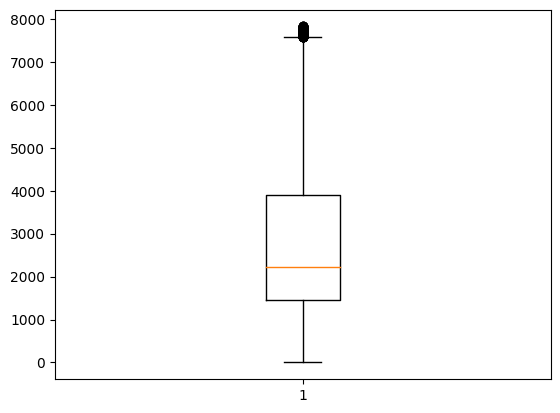

district_name


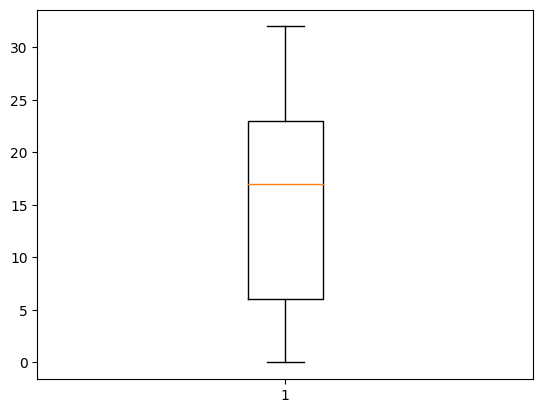

state_name


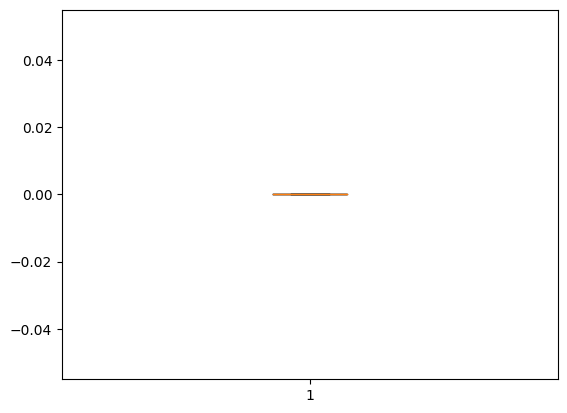

In [37]:
for i in df.columns:
  plt.boxplot(df[i])
  print(i)
  plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[["arrivals_in_qtl","min_price","max_price","modal_price"]]=ss.fit_transform(df[["arrivals_in_qtl","min_price","max_price","modal_price"]])

APMC


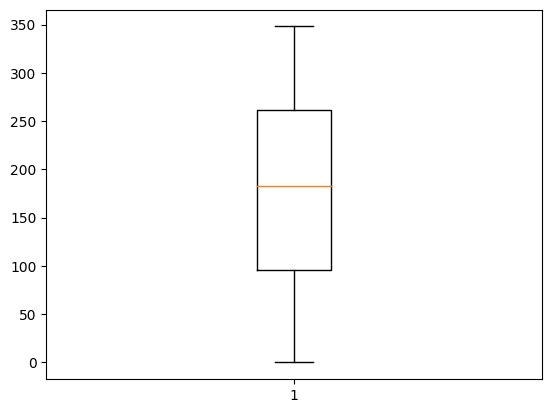

Commodity


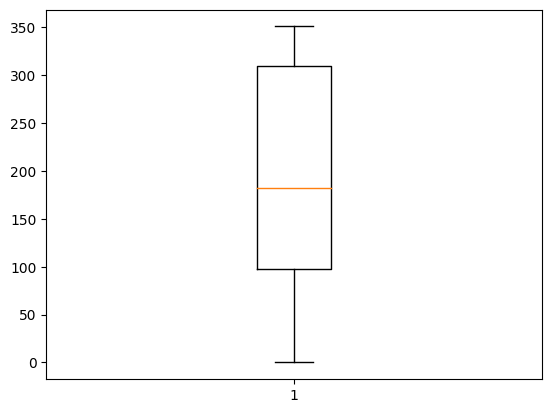

Year


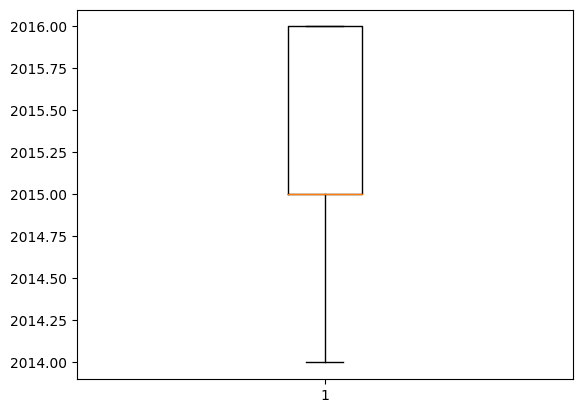

Month


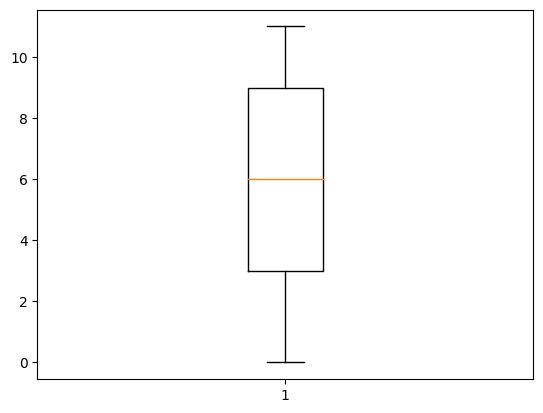

arrivals_in_qtl


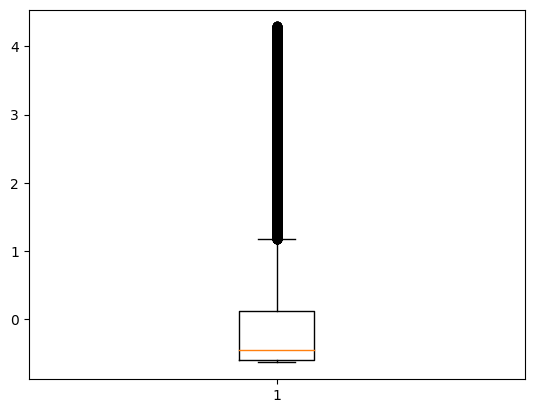

min_price


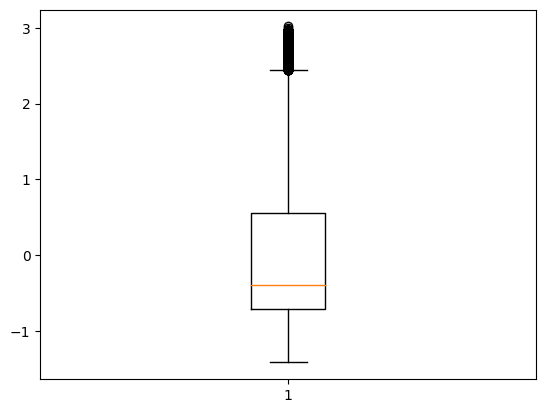

max_price


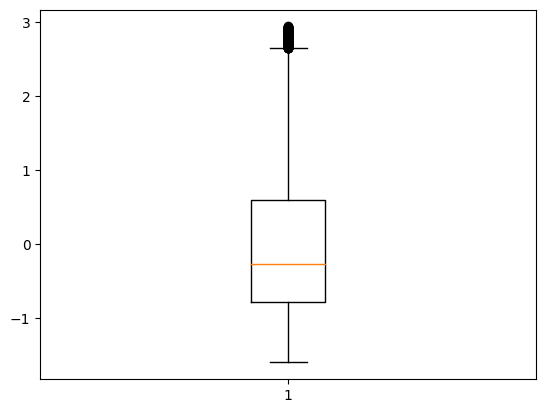

modal_price


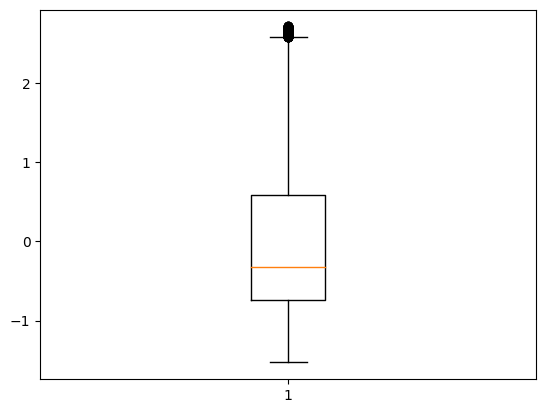

district_name


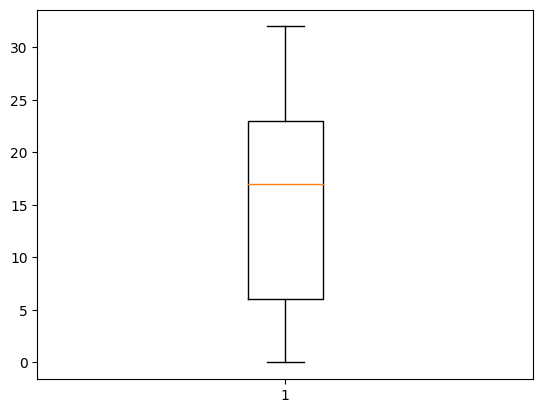

state_name


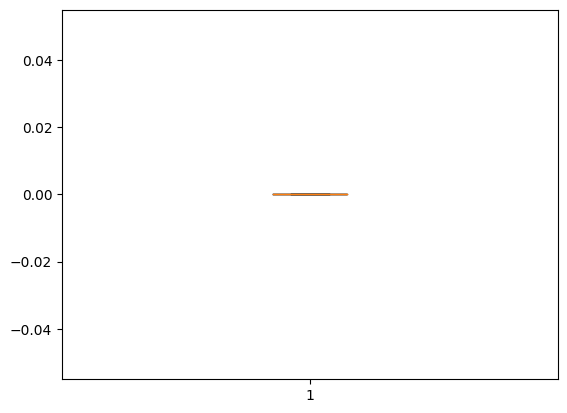

In [39]:
for i in df.columns:
  plt.boxplot(df[i])
  print(i)
  plt.show()


In [40]:
df.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,state_name
0,4,24,2015,0,-0.522957,-0.624366,-0.806102,-0.735812,0,0
1,4,24,2016,0,-0.483234,-0.409918,-0.605226,-0.512542,0,0
2,4,348,2015,0,1.204260,-0.531177,-0.623393,-0.590578,0,0
3,4,348,2016,0,-0.069820,-0.431251,-0.452103,-0.445344,0,0
5,4,310,2016,0,2.440088,-0.462127,-0.330642,-0.380314,0,0


In [43]:
x=df[["arrivals_in_qtl","min_price","max_price"]]
y=df["modal_price"]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)

In [45]:
x_train

,arrivals_in_qtl,min_price,max_price
15546,-0.614173,-0.178629,0.066958
53824,-0.424385,1.534707,1.496971
12298,-0.636241,0.326614,0.004671
46597,0.499544,-0.930319,-0.811293
50347,-0.302273,-1.004983,-1.154911
...,...,...,...
27855,-0.630356,-0.754045,-0.994521
58550,-0.609759,2.796692,2.288539
54203,-0.489119,-1.392897,-1.563412
55324,0.340652,-0.523879,-0.533076


In [46]:
x_train.shape

(39057, 3)

In [47]:
y_train

,modal_price
15546,-0.065461
53824,1.649164
12298,0.151306
46597,-0.861536
50347,-1.096728
...,...
27855,-0.891884
58550,2.535739
54203,-1.505875
55324,-0.537470


In [48]:
y_train.shape

(39057,)

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
pred=lr.predict(x_test)
pred

array([ 1.20775638, -0.25400312, -0.1691075 , ..., -0.67937825,
       -0.70815565,  1.23011751])

In [51]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,pred)

0.9852186518620546

In [52]:
mean_squared_error(y_test,pred)

0.014556598715468591